In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:40px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
POWER_PATH = "data/기본/법정동별시간별전력사용량.csv"

WEATHER_FILES = [
    "data/기본/AOS/SURFACE_ASOS_108_DAY_2022_2022_2023.csv",
    "data/기본/AOS/SURFACE_ASOS_108_DAY_2023_2023_2024.csv",
    "data/기본/AOS/SURFACE_ASOS_108_DAY_2024_2024_2025.csv",
]

In [4]:
WEATHER_FILES

['data/기본/AOS/SURFACE_ASOS_108_DAY_2022_2022_2023.csv',
 'data/기본/AOS/SURFACE_ASOS_108_DAY_2023_2023_2024.csv',
 'data/기본/AOS/SURFACE_ASOS_108_DAY_2024_2024_2025.csv']

In [5]:
POWER_PATH

'data/기본/법정동별시간별전력사용량.csv'

In [6]:


power = pd.read_csv(POWER_PATH, encoding="cp949")
power.head(5)

,SIGUNGU_CD,BJDONG_CD,USE_YM,USE_HM,FDRCT_VLD_KWH
0,11650,10700,20220628,100,10782.0565
1,11650,10800,20220628,100,11394.8635
2,11650,10900,20220628,100,7273.9620
3,11740,10300,20220628,100,11008.8110
4,11710,11300,20220628,100,2905.1120


In [7]:
power.columns

Index(['SIGUNGU_CD', 'BJDONG_CD', 'USE_YM', 'USE_HM', 'FDRCT_VLD_KWH'], dtype='object')

In [8]:
Y_COL = "FDRCT_VLD_KWH"

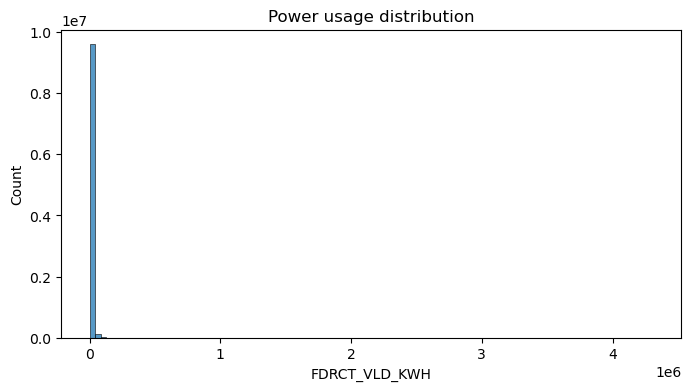

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(power[Y_COL], bins=100)
plt.title("Power usage distribution")
plt.show()

In [10]:
import pandas as pd

power = pd.read_csv(POWER_PATH, encoding="cp949")

In [11]:
power.head()

,SIGUNGU_CD,BJDONG_CD,USE_YM,USE_HM,FDRCT_VLD_KWH
0,11650,10700,20220628,100,10782.0565
1,11650,10800,20220628,100,11394.8635
2,11650,10900,20220628,100,7273.9620
3,11740,10300,20220628,100,11008.8110
4,11710,11300,20220628,100,2905.1120


In [12]:
power2 = power[["BJDONG_CD", "USE_YM", "FDRCT_VLD_KWH"]].copy()
power2.head()

,BJDONG_CD,USE_YM,FDRCT_VLD_KWH
0,10700,20220628,10782.0565
1,10800,20220628,11394.8635
2,10900,20220628,7273.9620
3,10300,20220628,11008.8110
4,11300,20220628,2905.1120


In [13]:
power2.rename(columns={
    "BJDONG_CD": "region",
    "USE_YM": "date_raw",
    "FDRCT_VLD_KWH": "y"
}, inplace=True)

power2.head()

,region,date_raw,y
0,10700,20220628,10782.0565
1,10800,20220628,11394.8635
2,10900,20220628,7273.9620
3,10300,20220628,11008.8110
4,11300,20220628,2905.1120


In [14]:
power2["date_raw"] = power2["date_raw"].astype(str)

power2["date"] = pd.to_datetime(
    power2["date_raw"],
    format="%Y%m%d",
    errors="coerce"
)

power2.head()

,region,date_raw,y,date
0,10700,20220628,10782.0565,2022-06-28
1,10800,20220628,11394.8635,2022-06-28
2,10900,20220628,7273.9620,2022-06-28
3,10300,20220628,11008.8110,2022-06-28
4,11300,20220628,2905.1120,2022-06-28


In [15]:
power2[["date_raw", "date"]].head(10)

,date_raw,date
0,20220628,2022-06-28
1,20220628,2022-06-28
2,20220628,2022-06-28
3,20220628,2022-06-28
4,20220628,2022-06-28
5,20220628,2022-06-28
6,20220628,2022-06-28
7,20220628,2022-06-28
8,20220628,2022-06-28
9,20220628,2022-06-28


In [16]:
# 전력 사용량을 숫자로 정리한다

power2["y"] = pd.to_numeric(power2["y"], errors="coerce")

In [17]:
power2.isna().mean()

region      0.0
date_raw    0.0
y           0.0
date        0.0
dtype: float64

In [18]:
power2.head(5)

,region,date_raw,y,date
0,10700,20220628,10782.0565,2022-06-28
1,10800,20220628,11394.8635,2022-06-28
2,10900,20220628,7273.9620,2022-06-28
3,10300,20220628,11008.8110,2022-06-28
4,11300,20220628,2905.1120,2022-06-28


In [19]:
#power2 = power2.drop(columns=["date_raw"])

In [20]:
power2["year"] = power2["date"].dt.year
power2["month"] = power2["date"].dt.month
power2["day"] = power2["date"].dt.day
power2["weekday"] = power2["date"].dt.weekday  # 월=0
power2["is_weekend"] = power2["weekday"].isin([5, 6]).astype(int)

In [21]:
power2.head(5)

,region,date_raw,y,date,year,month,day,weekday,is_weekend
0,10700,20220628,10782.0565,2022-06-28,2022,6,28,1,0
1,10800,20220628,11394.8635,2022-06-28,2022,6,28,1,0
2,10900,20220628,7273.9620,2022-06-28,2022,6,28,1,0
3,10300,20220628,11008.8110,2022-06-28,2022,6,28,1,0
4,11300,20220628,2905.1120,2022-06-28,2022,6,28,1,0


In [22]:
import pandas as pd

w0 = pd.read_csv(WEATHER_FILES[0], encoding="cp949")
w0.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,108,2022-01-01,-4.3,-10.2,710.0,2.3,1544,NaN,NaN,NaN,...,0.9,2.7,6.6,10.1,15.1,17.2,1.3,1.8,0.3,NaN
1,108,2022-01-02,-1.3,-5.2,2356.0,3.0,1551,4.17,NaN,NaN,...,0.8,2.7,6.4,10.0,15.0,17.2,1.1,1.6,NaN,NaN
2,108,2022-01-03,-1.9,-8.0,714.0,2.5,1542,4.00,NaN,NaN,...,0.8,2.5,6.2,9.8,14.9,17.2,1.1,1.6,0.0,NaN
3,108,2022-01-04,-2.5,-5.6,2400.0,1.0,1445,0.92,NaN,NaN,...,0.7,2.5,6.1,9.7,14.8,17.1,1.4,2.0,NaN,NaN
4,108,2022-01-05,-2.8,-7.8,634.0,1.9,1518,NaN,NaN,NaN,...,0.7,2.4,5.9,9.5,14.7,17.1,1.0,1.4,NaN,NaN


In [23]:
dfs = []
for fp in WEATHER_FILES:
    tmp = pd.read_csv(fp, encoding="cp949")
    dfs.append(tmp)

weather = pd.concat(dfs, ignore_index=True)
weather.shape

(1096, 59)

In [24]:
# list(weather.columns)

In [25]:
weather["date"] = pd.to_datetime(weather["일시"])

In [26]:
weather[["일시", "date"]].head()

,일시,date
0,2022-01-01,2022-01-01
1,2022-01-02,2022-01-02
2,2022-01-03,2022-01-03
3,2022-01-04,2022-01-04
4,2022-01-05,2022-01-05


In [27]:
weather = weather.sort_values("date")
weather = weather.drop_duplicates(subset=["date"]).reset_index(drop=True)

In [28]:
weather["date"].duplicated().sum()

np.int64(0)

In [29]:
df = power2

In [30]:
df = df[[
    "region",
    "date",
    "y",
    "year",
    "month",
    "day",
    "weekday",
    "is_weekend"
]]

In [31]:
weather = weather[[
    "date",
    "평균기온(°C)",
    "최저기온(°C)",
    "최고기온(°C)"
]].copy()

In [32]:
weather.head()

,date,평균기온(°C),최저기온(°C),최고기온(°C)
0,2022-01-01,-4.3,-10.2,2.3
1,2022-01-02,-1.3,-5.2,3.0
2,2022-01-03,-1.9,-8.0,2.5
3,2022-01-04,-2.5,-5.6,1.0
4,2022-01-05,-2.8,-7.8,1.9


In [33]:
weather.columns = [
    "date",
    "TA_AVG",
    "TA_MIN",
    "TA_MAX"
]

In [34]:
weather.head()

,date,TA_AVG,TA_MIN,TA_MAX
0,2022-01-01,-4.3,-10.2,2.3
1,2022-01-02,-1.3,-5.2,3.0
2,2022-01-03,-1.9,-8.0,2.5
3,2022-01-04,-2.5,-5.6,1.0
4,2022-01-05,-2.8,-7.8,1.9


In [35]:
weather["temp_range"] = weather["TA_MAX"] - weather["TA_MIN"]

In [36]:
weather.dtypes

date          datetime64[ns]
TA_AVG               float64
TA_MIN               float64
TA_MAX               float64
temp_range           float64
dtype: object

In [37]:
temp_map = weather.set_index("date")[[
    "TA_AVG", "TA_MIN", "TA_MAX", "temp_range"
]]

In [38]:
temp_map.head()

,TA_AVG,TA_MIN,TA_MAX,temp_range
date,,,,
2022-01-01,-4.3,-10.2,2.3,12.5
2022-01-02,-1.3,-5.2,3.0,8.2
2022-01-03,-1.9,-8.0,2.5,10.5
2022-01-04,-2.5,-5.6,1.0,6.6
2022-01-05,-2.8,-7.8,1.9,9.7


In [39]:
df["TA_AVG"] = df["date"].map(temp_map["TA_AVG"])
df["TA_MIN"] = df["date"].map(temp_map["TA_MIN"])
df["TA_MAX"] = df["date"].map(temp_map["TA_MAX"])
df["temp_range"] = df["date"].map(temp_map["temp_range"])

In [40]:
df[["date", "y", "TA_AVG", "TA_MIN", "TA_MAX", "temp_range"]].head()

,date,y,TA_AVG,TA_MIN,TA_MAX,temp_range
0,2022-06-28,10782.0565,26.9,25.7,27.9,2.2
1,2022-06-28,11394.8635,26.9,25.7,27.9,2.2
2,2022-06-28,7273.9620,26.9,25.7,27.9,2.2
3,2022-06-28,11008.8110,26.9,25.7,27.9,2.2
4,2022-06-28,2905.1120,26.9,25.7,27.9,2.2


In [41]:
df[["TA_AVG", "TA_MIN", "TA_MAX"]].isna().sum()

TA_AVG        0
TA_MIN    11184
TA_MAX        0
dtype: int64

In [42]:
df.loc[df["TA_MIN"].isna(), ["date"]].head(20)

,date
323328,2022-08-08
323329,2022-08-08
323330,2022-08-08
323331,2022-08-08
323332,2022-08-08
323333,2022-08-08
323334,2022-08-08
323335,2022-08-08
323336,2022-08-08
323337,2022-08-08


In [43]:
missing_rate = df["TA_MIN"].isna().mean()
missing_rate

np.float64(0.0011465120160282052)

In [44]:
weather = weather.sort_values("date").reset_index(drop=True)

cols = ["TA_AVG", "TA_MIN", "TA_MAX", "temp_range"]
weather[cols] = weather[cols].interpolate(limit_direction="both")

In [45]:
temp_map = weather.set_index("date")[cols]

In [46]:
df["TA_AVG"] = df["date"].map(temp_map["TA_AVG"])
df["TA_MIN"] = df["date"].map(temp_map["TA_MIN"])
df["TA_MAX"] = df["date"].map(temp_map["TA_MAX"])
df["temp_range"] = df["date"].map(temp_map["temp_range"])

In [47]:
df[cols].isna().sum()

TA_AVG        0
TA_MIN        0
TA_MAX        0
temp_range    0
dtype: int64

In [48]:
df.columns

Index(['region', 'date', 'y', 'year', 'month', 'day', 'weekday', 'is_weekend',
       'TA_AVG', 'TA_MIN', 'TA_MAX', 'temp_range'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9754804 entries, 0 to 9754803
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   region      int64         
 1   date        datetime64[ns]
 2   y           float64       
 3   year        int32         
 4   month       int32         
 5   day         int32         
 6   weekday     int32         
 7   is_weekend  int64         
 8   TA_AVG      float64       
 9   TA_MIN      float64       
 10  TA_MAX      float64       
 11  temp_range  float64       
dtypes: datetime64[ns](1), float64(5), int32(4), int64(2)
memory usage: 744.2 MB


In [51]:
df.to_csv(
    "data/power_weather_day.csv.gz",
    index=False,
    encoding="utf-8",
    compression="gzip"
)